# NHGtools

Use the NHGtools to create a regional model grid of the Mississippi Embayment Regional Aquifer Study area that aligns with the National Hydrogeologic Grid

In [1]:
import sys
sys.path.append('../')
import NHGtools as nt

### Define desired area

For this example, we'll intially use coordinates of the previous MERAS study area.
We also need to define a name for the output feature class, and a factor to scale the new grid. The fac is set to 10, which means the new grid cells will be 10 times larger than the NHG grid cells, or 10 km.

The default output format for the feature class is a geopackage. This can be changed to a shapefile by specifying the fctype as 'shp'.

In [2]:
# extent of meras study area in Albers projection

merasll = 179844.69,939365.02
merasur = 811872.82,1603420.72
merasShp = {'ll':merasll,
            'lr':[merasur[0], merasll[1]],
            'ur':merasur,
            'ul':[merasll[0], merasur[1]]}

fc = 'MERAS10km' # name of output feature class
fac = 10
fctype = 'gpkg'

In [3]:
# instantiate the class
ng = nt.NHGtools.nhg(merasShp, fc=fc, fac=fac, fctype=fctype)

### fit2national

use the 'fit2national' function to snap the MERAS coordinates to the NHG with a cell size of 10 km

In [4]:
ng.fit2national()

national grid
{'ll': [-2553045.0, -92715.0], 'lr': [2426955.0, -92715.0], 'ur': [2426955.0, 3907285.0], 'ul': [-2553045.0, 3907285.0]}
new local extent
{'ll': [176955.0, 937285.0], 'ur': [816955.0, 1607285.0], 'lr': [816955.0, 937285.0], 'ul': [176955.0, 1607285.0]}
starting row and col of national grid
231 274
number of rows, columns, and cellsize of new grid
67 64 10000


### create the new grid aligned to the NHG

use the fctype option to create the grid in the geopackage format

In [5]:
ng.createGrid()

64 67
new cols and rows 64 67
64 of 64 cols

### Rasterize polygons if desired

In [5]:
rasterName = 'meras10kmCellNum.tif'

ng.rasterizeGrid(rasterName=rasterName)

Rasterizification complete


In [3]:
import fishnet as fn
import os

fc = 'natlGrid1km.gpkg'
lyr = 'modelgrid'
natlGrid = 'natlCellNum.tif'
natExt, ngrows, ngcols = nu.NHGextent()
cellsize = 1000

nu.rasterizeGrid(fc, natlGrid, lyrName=lyr, nrow=ngrows, ncol=ngcols,
                 upperleft=natExt['ul'], cellsize=cellsize)

In [5]:
ng.makeCellNumRaster()

(67, 64)


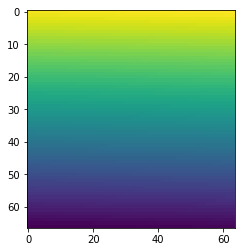

In [7]:
import matplotlib.pyplot as plt
print(ng._nhg__grid.shape)
plt.imshow(ng._nhg__grid)
plt.show()